In [1]:
import json, os, sys
os.chdir("../scripts/diffuser_icons/")
from dataset import *
from config import ConditionalTrainingConfig

In [2]:
max_num_objs = 30
with open("../../data/nouns/all_nouns.txt", "r") as f:
    nouns = [x.strip() for x in f.readlines()][:max_num_objs]
print(len(nouns), nouns[0])
with open("../../data/matplotlib/unicode.jsonl", "r", encoding="unicode-escape") as f: 
    icons = [(json.loads(x)[0], json.loads(x)[2]) for x in f.readlines()][:max_num_objs]
print(len(icons), icons[0])


30 soda
30 ('∦', 'DejaVuSans')


In [29]:
canvas_size = (256, 256)
icon_size = 256
fontsize = 220
train_pairs, test_pairs = create_data_single_obj(nouns, icons, canvas_size=canvas_size, icon_size=icon_size, fontsize=fontsize)
print(len(train_pairs), len(test_pairs))

30 30


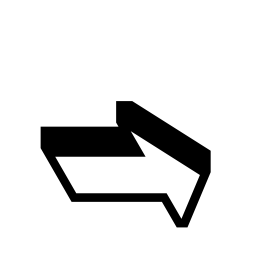

In [32]:
#print(train_pairs[5][0])
train_pairs[16][1]

In [10]:
nouns[23], nouns[50]

('soap', 'cabinet')

In [12]:
train_sentences = [x[0] for x in train_pairs]
test_sentences = [x[0] for x in test_pairs]
"a cabinet is at the bottom of a soap." in train_sentences

False

In [7]:
sys.getsizeof(train_pairs)/1000000

0.321096

In [2]:
sys.path.append("../diffuser_colored_sq/")
from model import T2IDiffusion
from utils import *
from torchsummary import summary
from diffusers.utils.torch_utils import randn_tensor
import torch

In [3]:
config = ConditionalTrainingConfig()
model = T2IDiffusion(config)

UNet2DConditionalModel_with_posemb only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True
Transformer2DModel_with_nonsquare_input only_cross_attention=True


In [4]:
device = "cuda"
image = randn_tensor((1, 3, 64, 32), device=device)
encoder_hidden_states = randn_tensor((1, 8, 512))
timesteps=torch.tensor([5])
#summary(model.unet, [image, encoder_hidden_states, 0])
# print(summary(
#     model.unet,
#     #input_data = [(2, 3, 64, 32), (1,), (2, 8, 512)], 
#     input_data = [image, timesteps, encoder_hidden_states],
#     batch_dim = 0, 
#     dtypes=[torch.FloatTensor, torch.FloatTensor, torch.FloatTensor], 
#     device=device,
#     depth = 10, 
# ))

In [5]:
count_parameters(model)

+----------------------------------------------------------------------------+----------+--------------------+
|                                  Modules                                   | #Params  |    Param shape     |
+----------------------------------------------------------------------------+----------+--------------------+
|                            unet.conv_in.weight                             |   1728   |   [64, 3, 3, 3]    |
|                             unet.conv_in.bias                              |    64    |        [64]        |
|                    unet.time_embedding.linear_1.weight                     |  16384   |     [256, 64]      |
|                     unet.time_embedding.linear_1.bias                      |   256    |       [256]        |
|                    unet.time_embedding.linear_2.weight                     |  65536   |     [256, 256]     |
|                     unet.time_embedding.linear_2.bias                      |   256    |       [256]        |
|

In [6]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

337742723

In [7]:
model.unet.down_blocks[2].attentions[0].is_input_patches
#model.unet.config.attention_head_dim

True

In [9]:
67108864*3 + 4194304*2 + 1024*3 + 256*2 + 309343363

519062147

In [26]:
model.unet.down_blocks[2].attentions[0].config.sample_size